In [1]:
import numpy as np
from scipy.integrate import odeint, cumulative_trapezoid
import matplotlib.pyplot as plt

plt.style.use('../maroon_ipynb.mplstyle')

**Example 2.3:** Solve the state variable equations for a mass, spring, and damper system with $m=10$, $b=8$, and $k=15$. The input force is 40, and the mass starts at a displacement of 1 and a velocity of 0.5. Verify the solution with energy conservation.

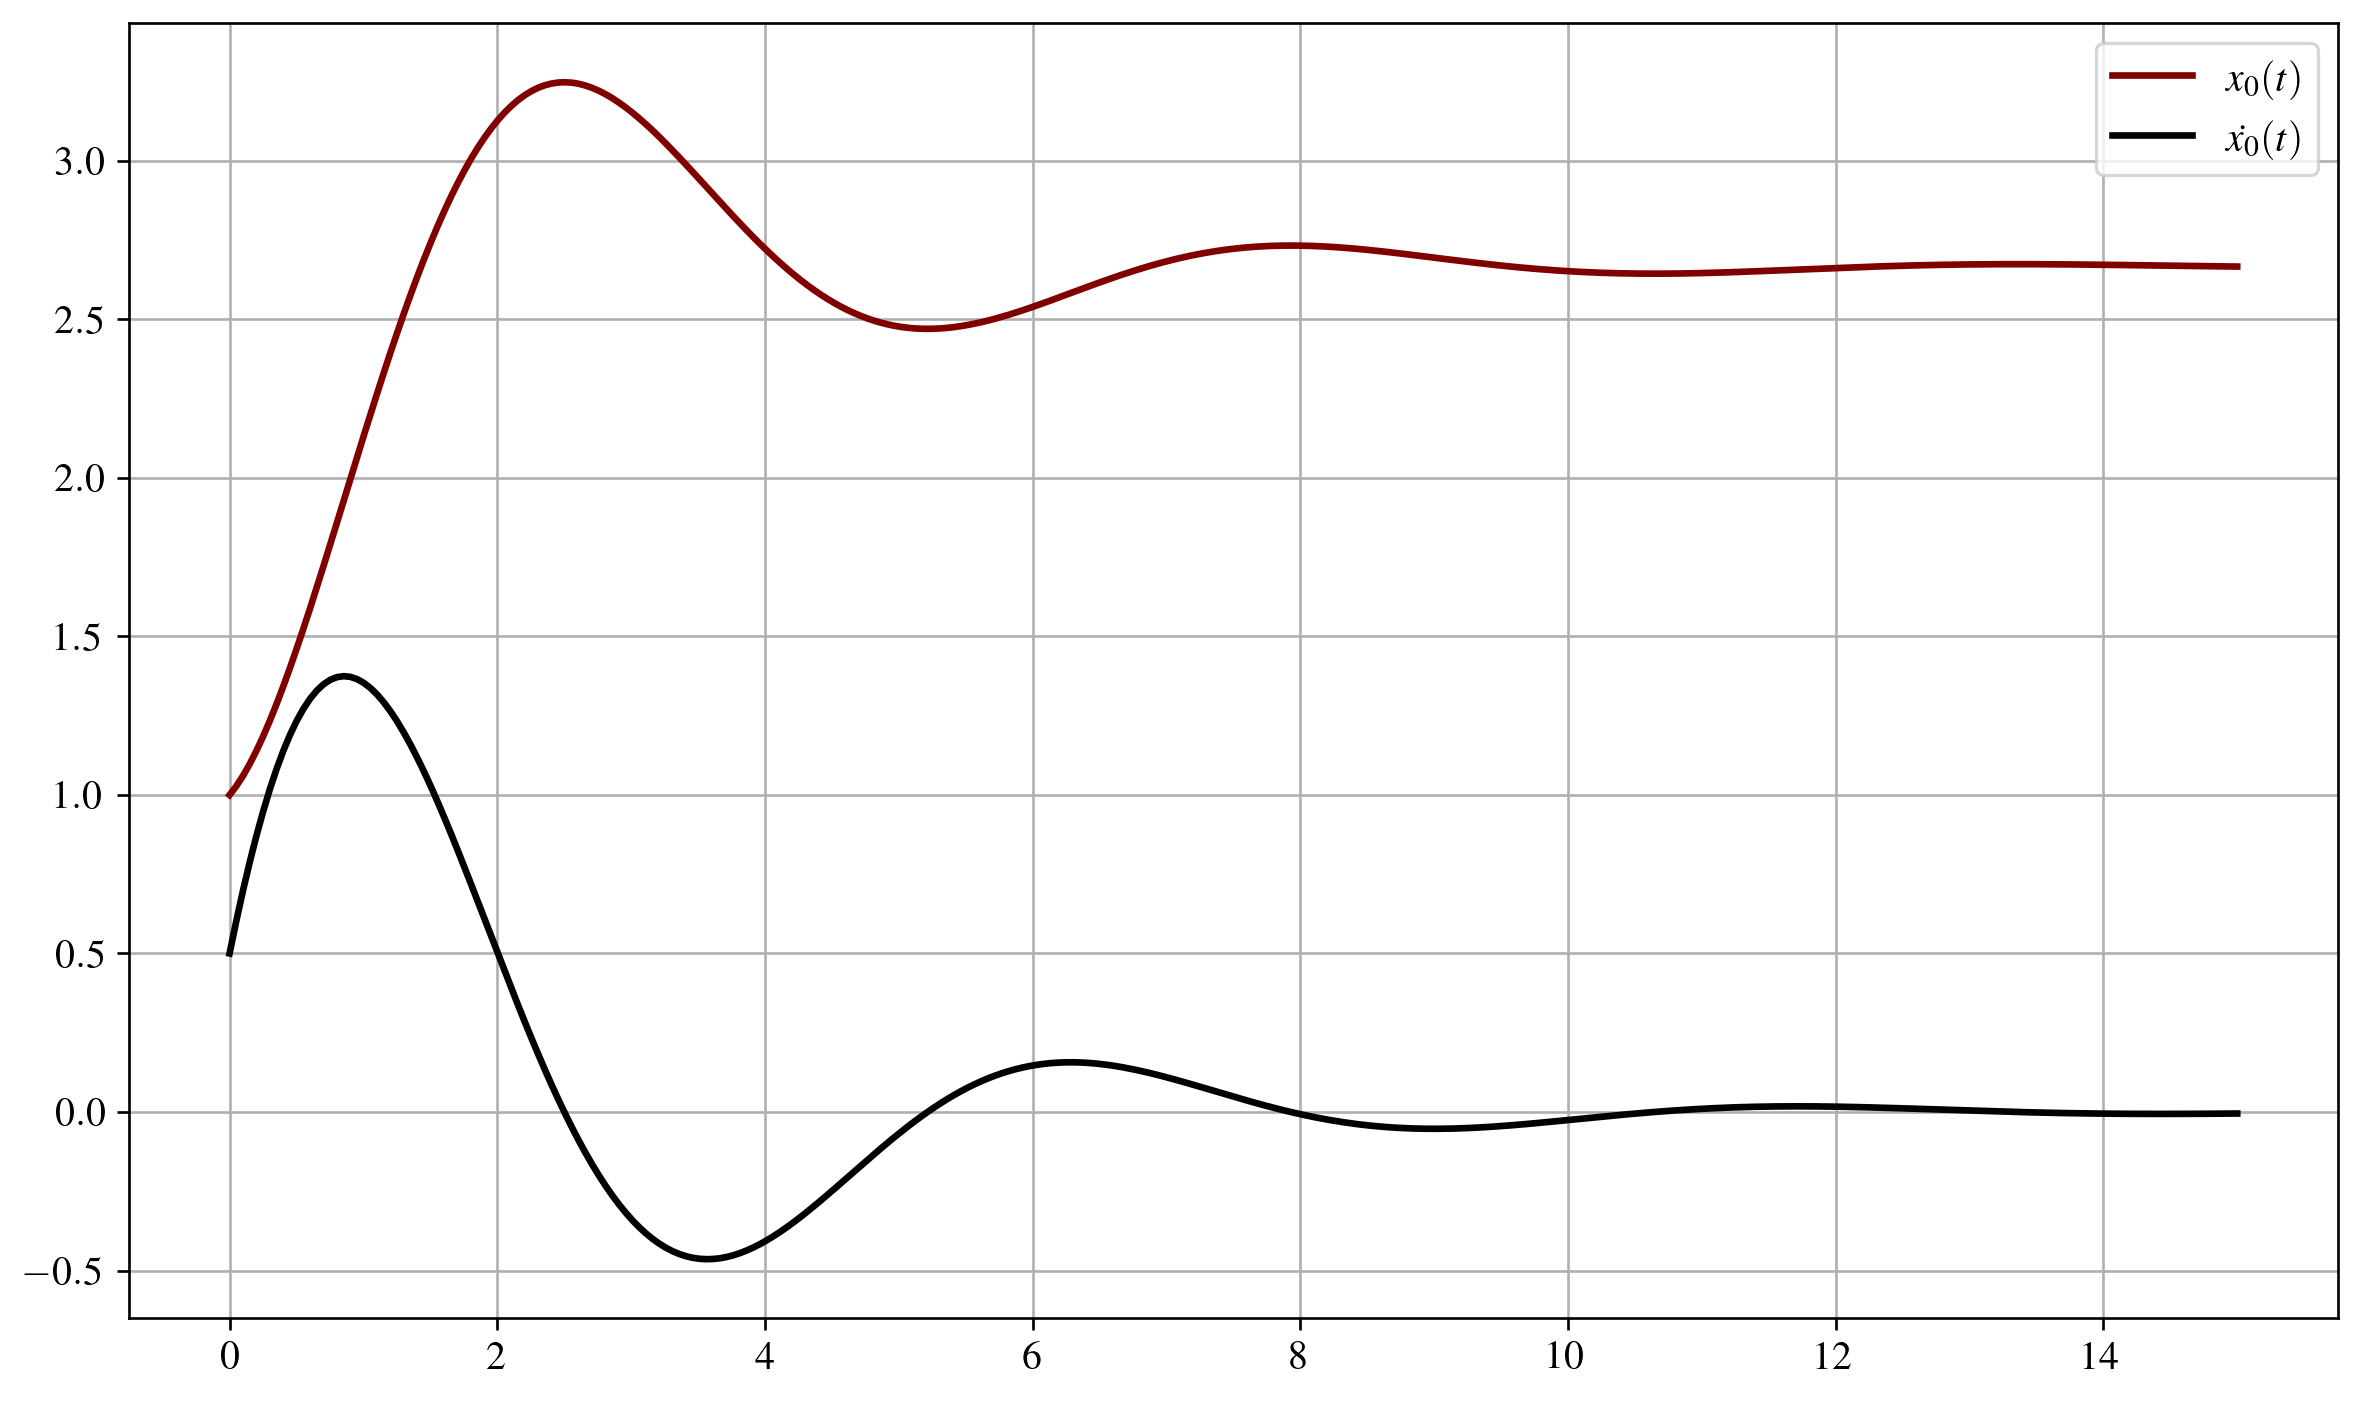

In [2]:
m, b, k = 10, 8, 15
f = lambda t_: 40

def state_vars(x, t):
    return [
        x[1],
        (f(t) - b*x[1] - k*x[0])/m
    ]

t_array = np.linspace(0, 15, 300)
sol = odeint(state_vars, [1, 0.5], t_array)

x0, x1 = sol[:, 0], sol[:, 1]
fig, ax = plt.subplots()
ax.plot(t_array, x0, label=r'$x_0(t)$')
ax.plot(t_array, x1, label=r'$\dot{x_0}(t)$')
ax.legend()
plt.show()

The energy conservation is defined like this:

$$\Delta E_{stored}(t)=E_{input}(t) - E_{output}(t)$$

where $\Delta E_{stored}$ is the summation of the potential energy in the spring and kinetic energy in the mass. The input energy is the work done by the input force, and the output energy is the work done by the damper.

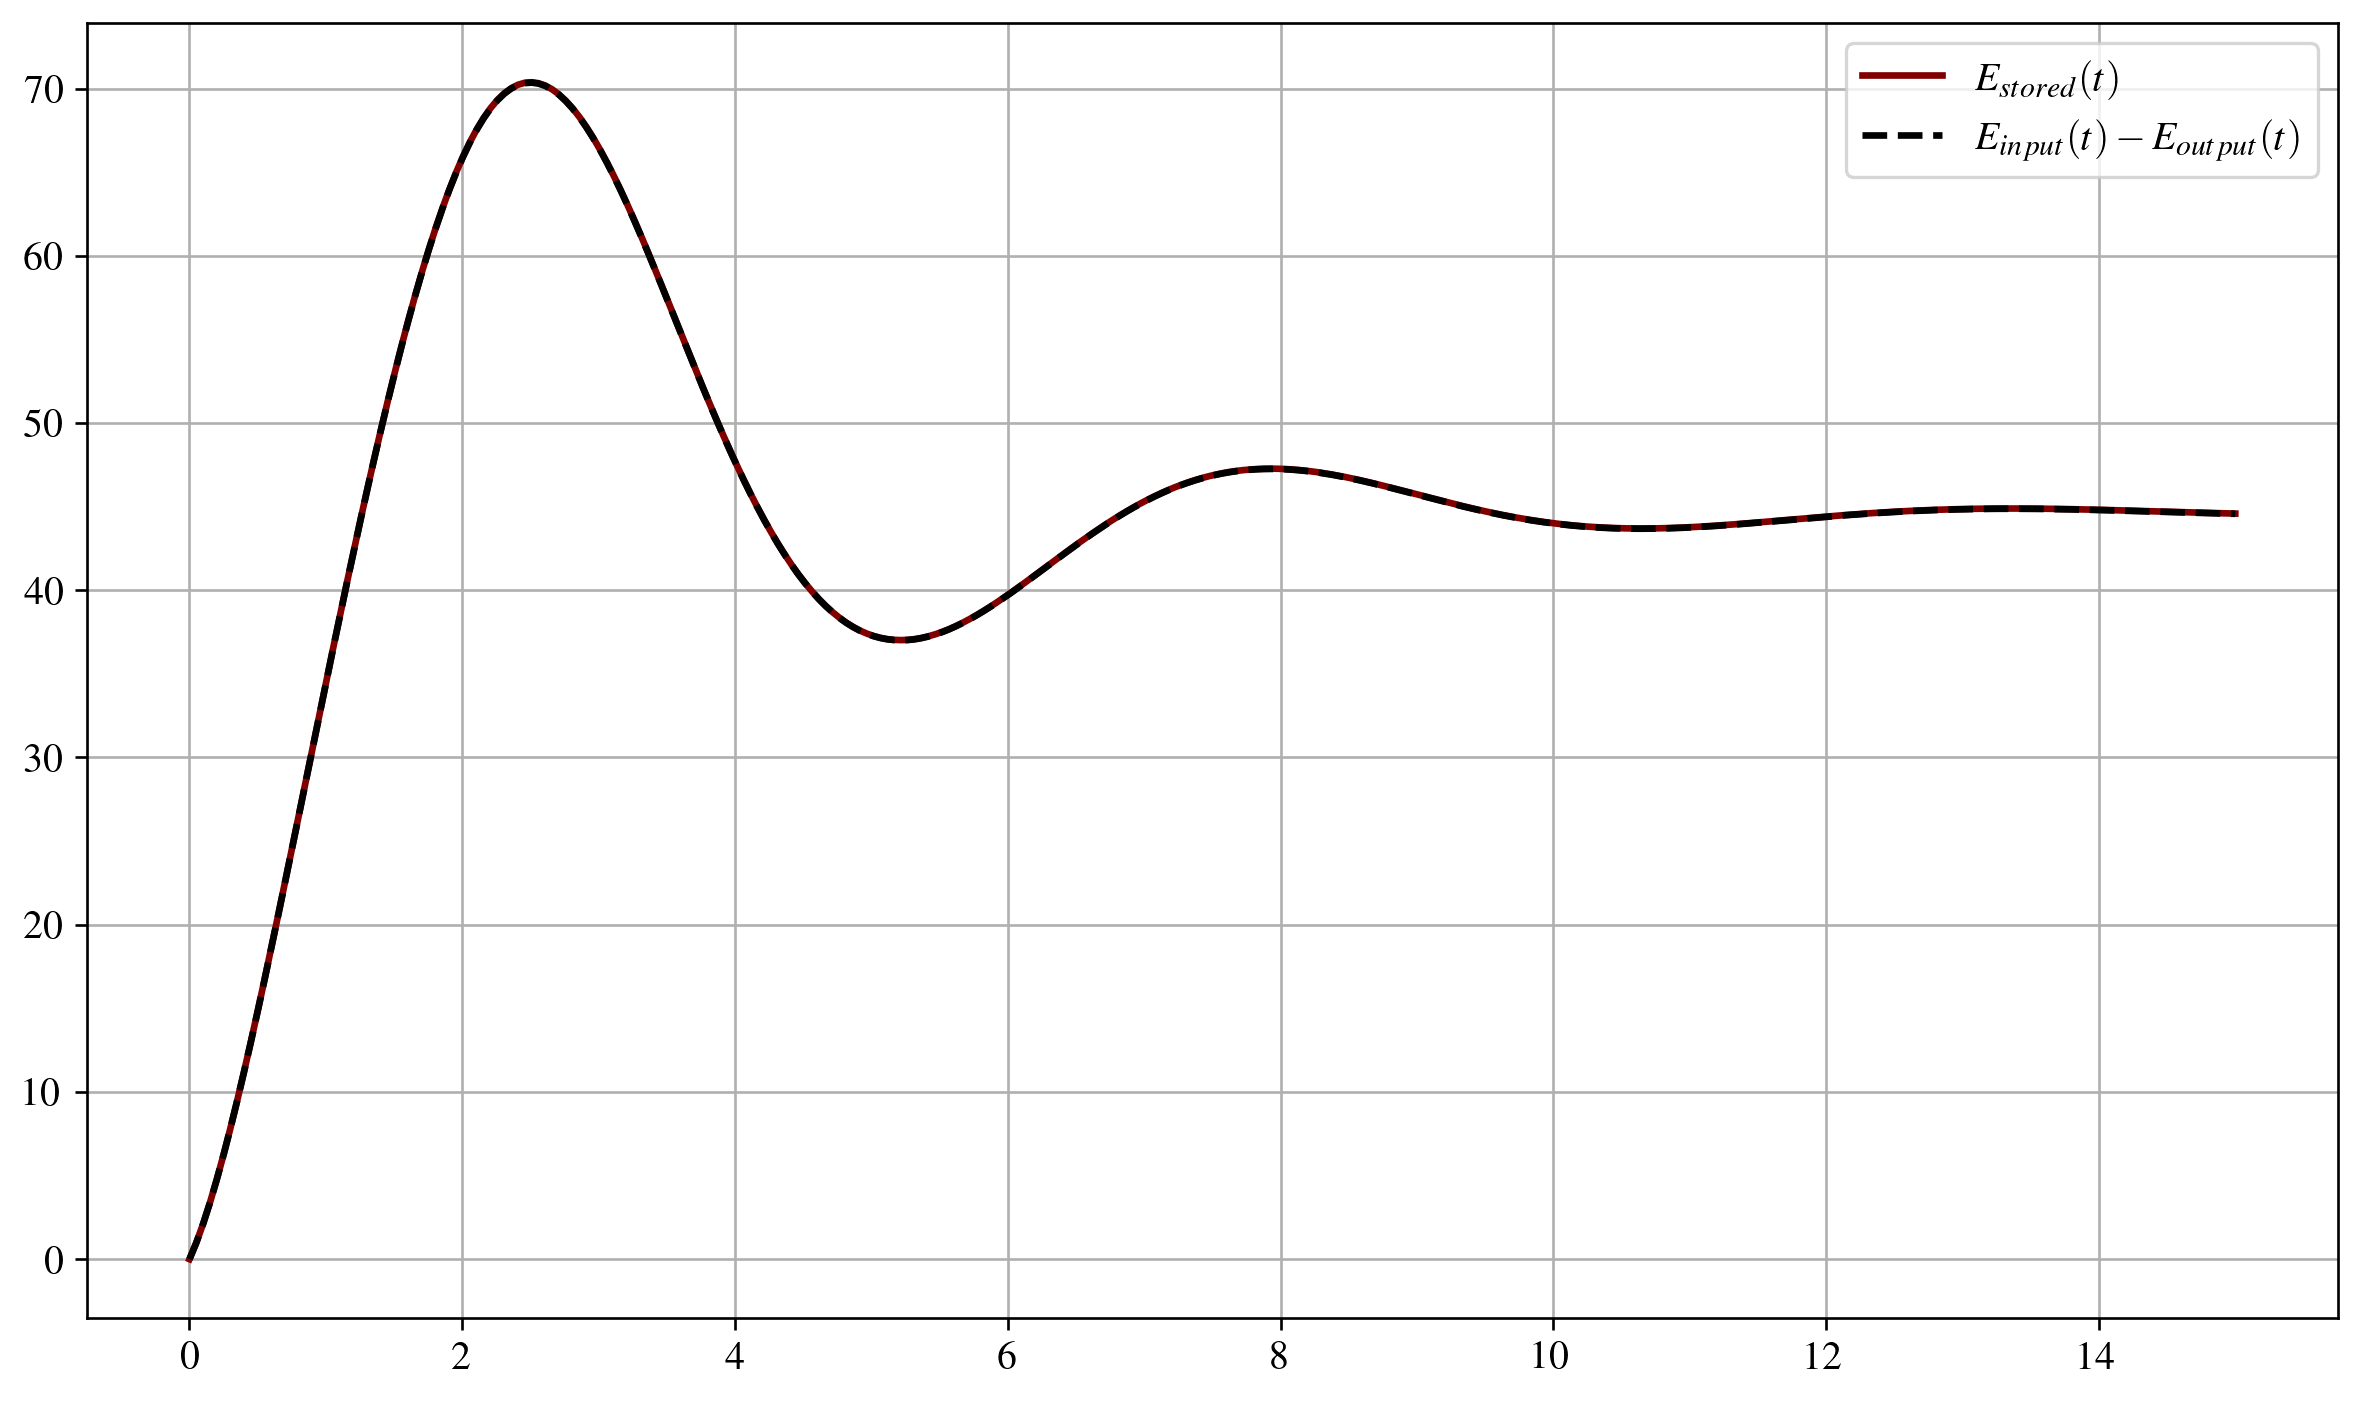

In [3]:
E_stored = 1/2*k*(x0**2 - 1**2) + 1/2*m*(x1**2 - 0.5**2)
E_input = cumulative_trapezoid(f(t_array)*x1, t_array, initial=0)
E_output = cumulative_trapezoid(b*x1**2, t_array, initial=0)

fig, ax = plt.subplots()
ax.plot(t_array, E_stored, label=r'$E_{stored}(t)$')
ax.plot(t_array, E_input - E_output, label=r'$E_{input}(t) - E_{output}(t)$', ls='--')
ax.legend()
plt.show()